In [1]:
%load_ext autoreload
%autoreload 2
import random
import html_parser
import ner
import psycopg2
import pandas as pd
import glob
import numpy as np
from tqdm import tqdm
from names_parser import NameParser
import db
import regex_patterns
from features import map_article_to_size
tqdm.pandas()

2022-02-13 15:46:44,511 INFO __init__ Loading dictionaries from /home/tonko22/kukushka/venv/lib/python3.8/site-packages/pymorphy2_dicts_ru/data
2022-02-13 15:46:44,616 INFO __init__ format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


In [2]:
df = pd.read_pickle("df_features.pkl")
print(len(df))
df.head(2)

46842


,encode,case_year_result,conviction,region_label,drug_label,punishment_type_label,general_drug_amount_label
271509,5ce34e191509ed1a580ed509f48b83f9,2019,False,74,6,1,1
271510,fb81962b58c96c09a99dd051b8a0cdd2,2019,False,74,6,1,1


In [5]:
df['conviction'] = df['conviction'].map({True: 1, False: 0})

In [6]:
len(df['region_label'].unique())

84

In [7]:
print(df.dtypes)

encode                       object
case_year_result              int64
conviction                    int64
region_label                  int64
drug_label                    int64
punishment_type_label         int64
general_drug_amount_label     int64
dtype: object


In [48]:
y = df["punishment_type_label"].values.reshape(-1, 1)
X = df[['conviction', 'region_label', 'drug_label', 'general_drug_amount_label']].values
X.shape, y.shape

((46842, 4), (46842, 1))

In [8]:
len(df)

46842

In [3]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split

X = df[["conviction", "region_label", "drug_label","general_drug_amount_label"]]
y = df['punishment_type_label'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

/home/tonko22/kukushka/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import  f1_score
from sklearn.metrics import r2_score

f1_score(y_test, y_pred, average='weighted')

0.9997154708404548

In [15]:
f1_score(y_test, y_pred, average='micro')

0.9997412343123302

In [16]:
f1_score(y_test, y_pred, average='macro')

0.9497814685314685

In [17]:
r2_score(y_test, y_pred)

0.9998481338112069

/home/tonko22/kukushka/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


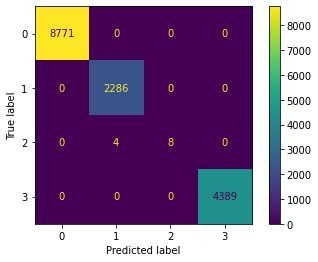

In [87]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

In [44]:
cvs = cross_val_score(
    estimator=model, X=X, y=y, groups=df['case_year_result'], cv=gss, scoring='roc_auc',
)
print(cvs)
print(cvs.mean(), cvs.min())

[nan nan nan nan nan]
nan nan


/home/tonko22/kukushka/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tonko22/kukushka/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tonko22/kukushka/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_

In [ ]:
feature_names[:26]

In [ ]:
# Labels
from sklearn.preprocessing import LabelEncoder

punishment_type_le = LabelEncoder()
punishment_type_le.classes_ = np.load('label_encoding/punishment_type_le.npy')

general_drug_amount_le = LabelEncoder()
general_drug_amount_le.classes_ = np.load('label_encoding/general_drug_amount_le.npy')

drug_le = LabelEncoder()
drug_le.classes_ = np.load('label_encoding/drug_le.npy', drug_le.classes_)

general_drug_amount_le = LabelEncoder()
general_drug_amount_le.classes = np.load('label_encoding/general_drug_amount_le.npy', general_drug_amount_le.classes_)